In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from scipy.stats import mannwhitneyu, ranksums, rankdata

In [2]:
# Set filepath
rep='/home/ebb505/ARE_Project/are-logs/constAnalysis/'
repConstAnalysis='/home/ebb505/ARE_Project/are-logs/constAnalysis/'
filename='noreptests.csv' 
oFn='dist'

In [3]:
# Get all directories
# foldBL = []
# foldPN = []
foldConstAnalysis = []
# foldPGR = []
# r=root, d=directories, f = files
# for r, d, f in os.walk(repBL):
#     for folder in d:
#         foldBL.append(os.path.join(r, folder))
# for r, d, f in os.walk(repPN):
#     for folder in d:
#         foldPN.append(os.path.join(r, folder))
for r, d, f in os.walk(repConstAnalysis):
    for folder in d:
        foldConstAnalysis.append(os.path.join(r, folder))
# for r, d, f in os.walk(repPGR):
#     for folder in d:
#         foldPGR.append(os.path.join(r, folder))

In [4]:
print("ConstAnalysis = ", len(foldConstAnalysis))

ConstAnalysis =  35


In [5]:
repConstAnalysis = []
for f in foldConstAnalysis:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) 
    repConstAnalysis.append(my_list)

In [6]:
population = 40
#replicates = len(repGR)
replicates = 20
#evaluations = len(repBL[0])
evaluations = 20000
features = len(repConstAnalysis[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  20 Evaluations:  20000 Features:  4 Generations:  500


In [7]:
sumRepConstAnalysis = []
for i in range(replicates):
    dat = np.array([[float(y) for y in x] for x in repConstAnalysis[i]]) # Convert to array
    counter = 0
    for j in range(len(repConstAnalysis[i])):
        if(dat[j,1] > 0 \
           and dat[j,2] > 0 \
           and dat[j,3] > 0 \
          ):
            counter = counter + 1
    sumRepConstAnalysis.append(counter/len(repConstAnalysis[i]))
    print(i)
print("Done!")
print(sumRepConstAnalysis)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Done!
[0.008610864885399519, 0.0006365372374283895, 0.011904761904761904, 0.01906614785992218, 0.009786651008025053, 0.003443081557994405, 0.0005598712296171881, 0.0031887755102040817, 0.0055248618784530384, 0.01339469707377387, 0.004323840763381542, 0.012913931173796984, 0.014737598849748382, 0.01076313625831527, 0.024759100642398287, 0.003155656170679838, 0.006277792309704421, 0.0009925937237535314, 0.007751937984496124, 0.010379638845442912]


In [17]:
sampleSizes = [3,6,11]
allDist = []
# For each sample size
for i in range(len(sampleSizes)):
    sampDis = []
    # For each distribution
    for j in range(3):
        tempDist = []
        for k in range(sampleSizes[i]):
            #print(k)
            tempDist.append(sumRepConstAnalysis[k+j])  
            #print(sumRepGR[k*j])
        sampDis.append(tempDist)
    allDist.append(sampDis)

In [18]:
print(len(allDist))
print(len(allDist[0]))
print(len(allDist[1][0]))
print(len(allDist[1][1]))

3
3
6
6


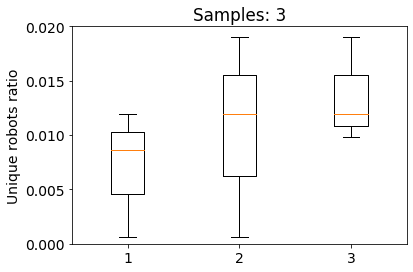

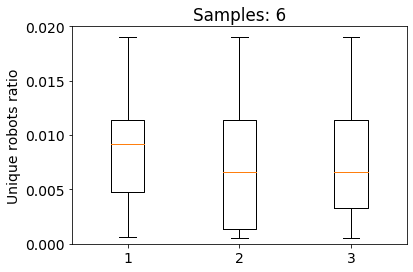

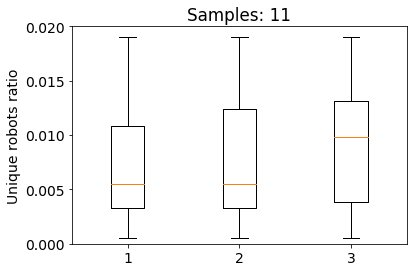

In [19]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}
plt.rc('font', **font)

for i in range(len(sampleSizes)):
    plt.figure(i)
    # Plot box plot stuff
    plt.boxplot([allDist[i][0], allDist[i][1], allDist[i][2]])
    #Label and stuff
    axes = plt.gca()
    axes.set_ylim([0.0,0.02])
    plt.ylabel('Distributions')
    plt.ylabel('Unique robots ratio')
    plt.title("Samples: " + str(sampleSizes[i]))
    rangeX = [1,2,3]
    posX = [1,2,3]
    plt.xticks(posX,rangeX)
    plt.savefig(rep+oFn+str(i)+'.png', dpi=200)

In [23]:
statTable = []
for i in range(len(sampleSizes)):
    statSample = []
    for j in range(len(sampleSizes)):
        statDist = []
        for k in range(len(sampleSizes)):
            if(j!=k):
                stat, p = mannwhitneyu(allDist[i][j], allDist[i][k])
                statDist.append(p)
            else:
                statDist.append(0)
        #print(np.max(statDist))
        statSample.append(statDist)
    statTable.append(statSample)
#print(statTable)
print(statTable[0][1][2])

0.5


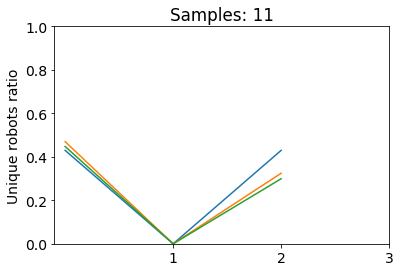

In [12]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}
plt.rc('font', **font)
for i in range(len(sampleSizes)):
    #plt.figure(i)
    # Plot box plot stuff
    plt.plot([statTable[i][1][0], statTable[i][1][1], statTable[i][1][2]])
    #Label and stuff
    axes = plt.gca()
    axes.set_ylim([0.0,1.0])
    plt.ylabel('Distributions')
    plt.ylabel('Unique robots ratio')
    plt.title("Samples: " + str(sampleSizes[i]))
    rangeX = [1,2,3]
    posX = [1,2,3]
    plt.xticks(posX,rangeX)
    plt.savefig(rep+oFn+str(i)+'.png', dpi=200)

In [26]:
size = len(sampleSizes)
table = [["-" for k in range(size)] for k in range(size)]
for i in range(size):
        for j in range(size):
            if i > j:
                w,p = ranksums(allDist[0][i],allDist[0][j])
                #p = round_to_n(p,2)
                table[i][j] = '-'
#                 A = -((R_x/size) - (size+1)/2)/size
#                 table[i][j] = A
            elif i < j:
                R_x,p = ranksums(allDist[2][i],allDist[2][j])
                A = -((R_x/size) - (size+1)/2)/size
                #A = round_to_n(A,3)
                table[i][j] = A
print(table)

[['-', 0.6849069474372378, 0.7469239020571795], ['-', '-', 0.7286836212866085], ['-', '-', '-']]
